<a href="https://colab.research.google.com/github/sherbeenyy/online-gaming-behavior-prediction-model/blob/master/online_gaming_behavior_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/online_gaming_behavior_dataset.csv')

In [ ]:
df.shape

(40034, 13)

In [ ]:
# check for missing values
df.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [ ]:
#fining duplicates
df.duplicated().sum()
# return the sum of duplicated rows in the data

0

In [ ]:
# identifing grabage
for i in df.select_dtypes(include = 'object').columns:
  print(df[i].value_counts())
  print('\n')

Gender
Male      23959
Female    16075
Name: count, dtype: int64


Location
USA       16000
Europe    12004
Asia       8095
Other      3935
Name: count, dtype: int64


GameGenre
Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: count, dtype: int64


GameDifficulty
Easy      20015
Medium    12011
Hard       8008
Name: count, dtype: int64


EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64




In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PlayerID,40034.0,29016.500000,11556.964675,9000.000000,19008.250000,29016.500000,39024.750000,49033.000000
Age,40034.0,31.992531,10.043227,15.000000,23.000000,32.000000,41.000000,49.000000
PlayTimeHours,40034.0,12.024365,6.914638,0.000115,6.067501,12.008002,17.963831,23.999592
InGamePurchases,40034.0,0.200854,0.400644,0.000000,0.000000,0.000000,0.000000,1.000000
SessionsPerWeek,40034.0,9.471774,5.763667,0.000000,4.000000,9.000000,14.000000,19.000000
AvgSessionDurationMinutes,40034.0,94.792252,49.011375,10.000000,52.000000,95.000000,137.000000,179.000000
PlayerLevel,40034.0,49.655568,28.588379,1.000000,25.000000,49.000000,74.000000,99.000000
AchievementsUnlocked,40034.0,24.526477,14.430726,0.000000,12.000000,25.000000,37.000000,49.000000


In [ ]:
df.describe(include = 'object').T

,count,unique,top,freq
Gender,40034,2,Male,23959
Location,40034,4,USA,16000
GameGenre,40034,5,Sports,8048
GameDifficulty,40034,3,Easy,20015
EngagementLevel,40034,3,Medium,19374


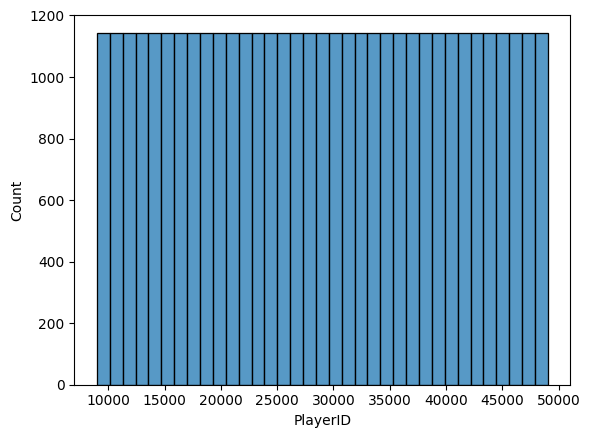

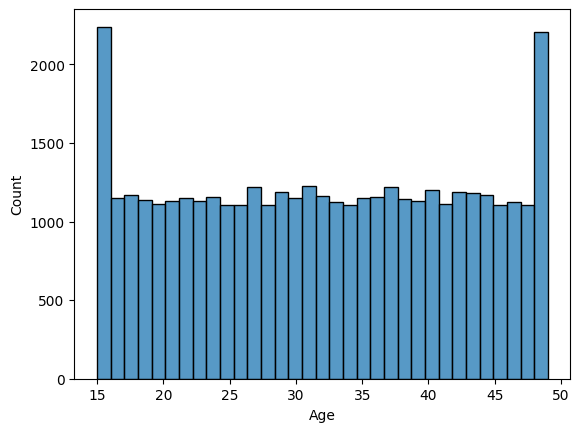

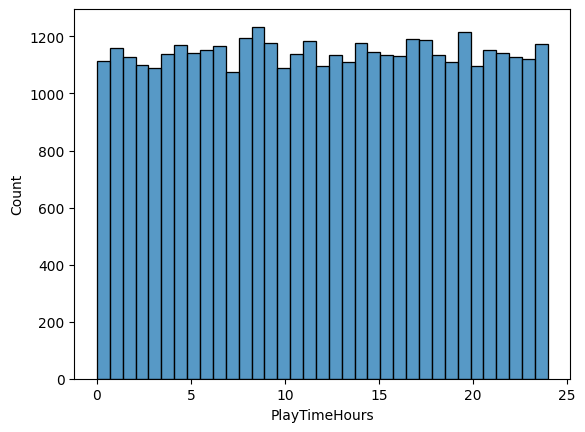

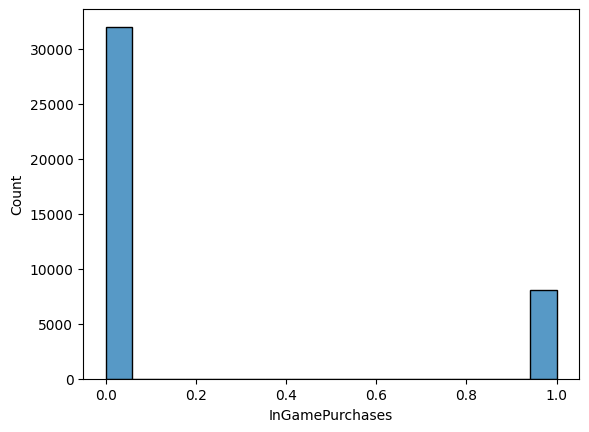

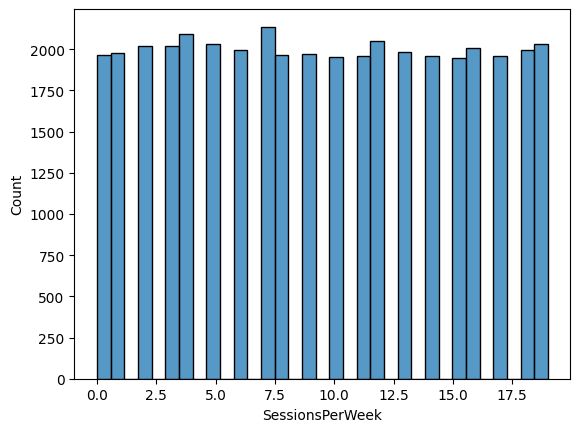

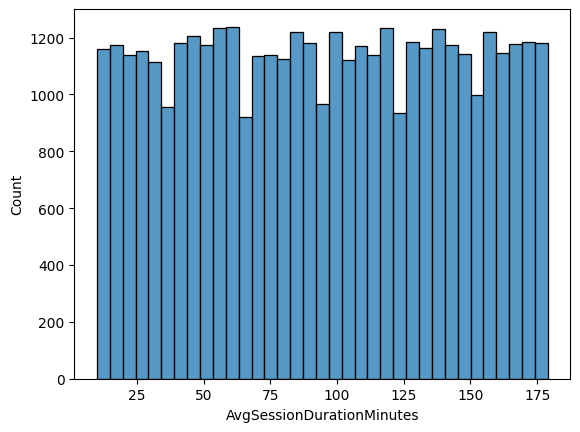

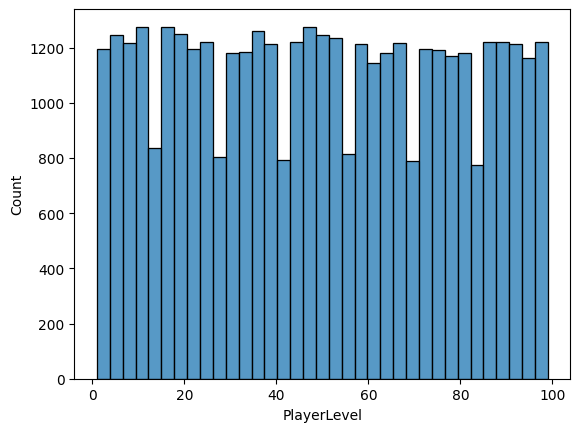

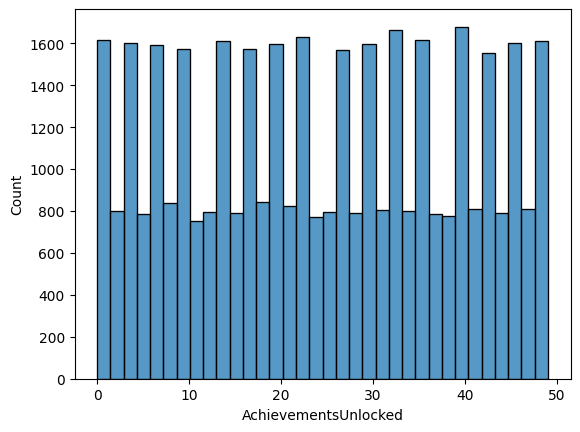

In [ ]:
# histogram to show the distribution of the data

for i in df.select_dtypes(include = 'number').columns:
   sns.histplot(data = df , x=i)
   plt.show()

In [ ]:

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Convert categorical columns to numerical using LabelEncoder and OneHotEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to categorical columns
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['GameDifficulty'] = label_encoder.fit_transform(df['GameDifficulty'])
df['EngagementLevel'] = label_encoder.fit_transform(df['EngagementLevel'])

# Apply OneHot Encoding to 'Location' and 'GameGenre'
df = pd.get_dummies(df, columns=['Location', 'GameGenre'])

df = df.drop(columns=['PlayerID'])

In [ ]:
df.head()

,Age,Gender,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Location_Asia,Location_Europe,Location_Other,Location_USA,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy
0,43,1,16.271119,0,2,6,108,79,25,2,False,False,True,False,False,False,False,False,True
1,29,0,5.525961,0,2,5,144,11,10,2,False,False,False,True,False,False,False,False,True
2,22,0,8.223755,0,0,16,142,35,41,0,False,False,False,True,False,False,False,True,False
3,35,1,5.265351,1,0,9,85,57,47,2,False,False,False,True,True,False,False,False,False
4,33,1,15.531945,0,2,2,131,95,37,2,False,True,False,False,True,False,False,False,False


In [ ]:
x = df.drop(columns=['EngagementLevel'])
y = df['EngagementLevel']

In [ ]:
y_categorical = keras.utils.to_categorical(y)
y_categorical

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y_categorical , test_size=0.3, random_state=42 , shuffle = True)

In [ ]:
# Normalize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print("train shape = ",x_train.shape)
print("test shape = ",x_test.shape)

train shape =  (28023, 18)
test shape =  (12011, 18)


In [ ]:
import tensorflow as tf
import keras
import keras.layers as kl
import keras.models as km

model = km.Sequential([
    kl.Dense(16, activation='tanh'),
    kl.Dense(32, activation='tanh'),
    kl.Dense(128, activation='tanh'),
    kl.Dense(32, activation='tanh'),
    kl.Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train = model.fit(x_train,y_train,
                         validation_data=(x_test,y_test),
                         epochs=200,
                         batch_size=10000,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                              patience=5,
                              monitor='val_accuracy',
                              restore_best_weights=True)])


Epoch 1/200
3/3 [==============================] - 2s 142ms/step - loss: 1.0956 - accuracy: 0.3813 - val_loss: 1.0263 - val_accuracy: 0.4562
Epoch 2/200
3/3 [==============================] - 0s 45ms/step - loss: 1.0070 - accuracy: 0.4722 - val_loss: 0.9671 - val_accuracy: 0.5135
Epoch 3/200
3/3 [==============================] - 0s 47ms/step - loss: 0.9564 - accuracy: 0.5149 - val_loss: 0.9290 - val_accuracy: 0.5403
Epoch 4/200
3/3 [==============================] - 0s 50ms/step - loss: 0.9200 - accuracy: 0.5412 - val_loss: 0.8944 - val_accuracy: 0.5699
Epoch 5/200
3/3 [==============================] - 0s 56ms/step - loss: 0.8851 - accuracy: 0.5725 - val_loss: 0.8594 - val_accuracy: 0.6102
Epoch 6/200
3/3 [==============================] - 0s 44ms/step - loss: 0.8498 - accuracy: 0.6084 - val_loss: 0.8257 - val_accuracy: 0.6395
Epoch 7/200
3/3 [==============================] - 0s 47ms/step - loss: 0.8155 - accuracy: 0.6443 - val_loss: 0.7943 - val_accuracy: 0.6665
Epoch 8/200
3/3 [==

In [ ]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 16)                304       
                                                                 
 dense_26 (Dense)            (None, 32)                544       
                                                                 
 dense_27 (Dense)            (None, 128)               4224      
                                                                 
 dense_28 (Dense)            (None, 32)                4128      
                                                                 
 dense_29 (Dense)            (None, 3)                 99        
                                                                 
Total params: 9299 (36.32 KB)
Trainable params: 9299 (36.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
y_pred = model.predict(x_test)
y_pred

376/376 [==============================] - 1s 2ms/step


array([[0.03900566, 0.02909749, 0.93189687],
       [0.01890417, 0.00659129, 0.9745045 ],
       [0.03109957, 0.84603626, 0.12286416],
       ...,
       [0.0166855 , 0.06653346, 0.91678107],
       [0.06886365, 0.56734174, 0.36379462],
       [0.03379468, 0.05870055, 0.90750474]], dtype=float32)

In [ ]:
model.evaluate(x_test,y_test)

376/376 [==============================] - 1s 2ms/step - loss: 0.3825 - accuracy: 0.8970


[0.3825235366821289, 0.8970111012458801]

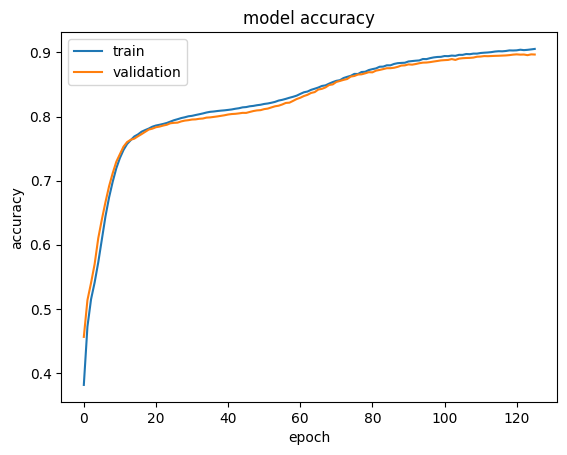

In [ ]:
plt.plot(train.history['accuracy'])
plt.plot(train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')


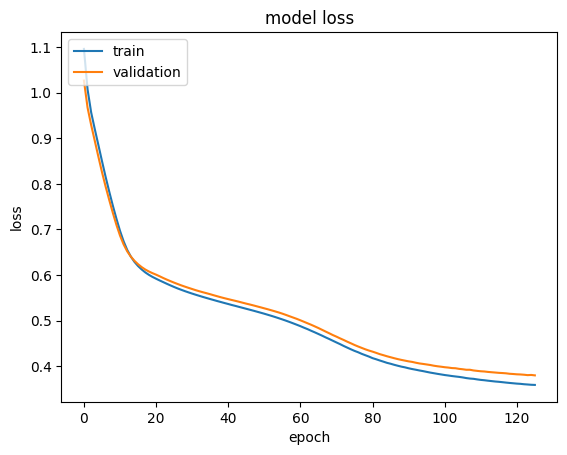

In [ ]:
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [ ]:
new_predicted = np.argmax(y_pred, axis=1)
new_test = np.argmax(y_test, axis=1)

print(classification_report(new_test, new_predicted))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      3132
           1       0.88      0.85      0.87      3069
           2       0.90      0.93      0.91      5810

    accuracy                           0.90     12011
   macro avg       0.90      0.89      0.89     12011
weighted avg       0.90      0.90      0.90     12011

